In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('../data/creditcard.csv')

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, digits=4))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9615    0.7653    0.8523        98

    accuracy                         0.9995     56962
   macro avg     0.9806    0.8826    0.9260     56962
weighted avg     0.9995    0.9995    0.9995     56962

[[56861     3]
 [   23    75]]


We do threshold tuning to trade a bit of precision → for more recall.

Right now your model predicts fraud when probability ≥ 0.5.
That’s default. It's rarely optimal in fraud detection.

We change threshold to 0.3 and evaluate.

In [6]:
y_scores = rf.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_scores >= 0.30).astype(int)

print(classification_report(y_test, y_pred_thresh, digits=4))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9419    0.8265    0.8804        98

    accuracy                         0.9996     56962
   macro avg     0.9708    0.9132    0.9401     56962
weighted avg     0.9996    0.9996    0.9996     56962

[[56859     5]
 [   17    81]]


<Figure size 600x400 with 0 Axes>

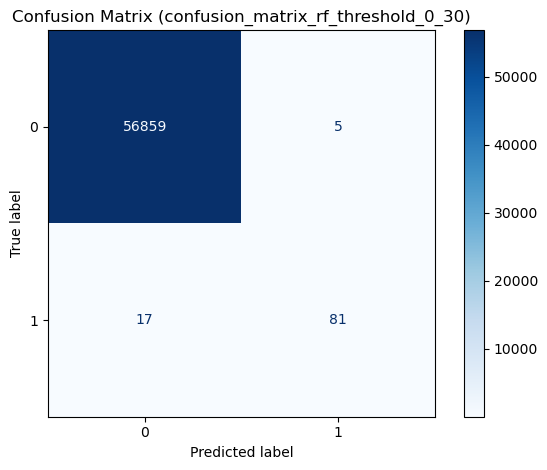

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_thresh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (confusion_matrix_rf_threshold_0_30)")
plt.tight_layout()
plt.savefig('../visuals/confusion_matrix_rf_threshold_0_30.png', dpi=300, bbox_inches='tight')
plt.show()

### Threshold Tuning Summary

Adjusting the Random Forest threshold from 0.5 to 0.3 improved recall and F1 score, reducing missed fraud cases with minimal precision loss.  
This demonstrates the importance of threshold calibration over default probability cutoffs in imbalanced classification problems.
